In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

In [3]:
btc_min = pd.read_csv(r"C:\Users\sujal\OneDrive\Desktop\Bit coin price prediction\btc_15m_data_2018_to_2025.csv")
btc_hour = pd.read_csv(r"C:\Users\sujal\OneDrive\Desktop\Bit coin price prediction\btc_4h_data_2018_to_2025.csv")
btc_four = pd.read_csv(r"C:\Users\sujal\OneDrive\Desktop\Bit coin price prediction\btc_1h_data_2018_to_2025.csv")
btc_day = pd.read_csv(r"C:\Users\sujal\OneDrive\Desktop\Bit coin price prediction\btc_1d_data_2018_to_2025.csv")
btc_data = pd.concat([btc_day, btc_four, btc_hour, btc_min], axis=0, ignore_index=True)

In [4]:
btc_data = btc_data[['Open time', 'Close', 'Volume']].copy()
btc_data = btc_data.rename(columns={'Open time': 'ds', 'Close': 'y', 'Volume': 'volume'})
btc_data['ds'] = pd.to_datetime(btc_data['ds'], errors='coerce').dt.tz_localize(None)
print(btc_data['ds'].min(), btc_data['ds'].max())

2018-01-01 00:00:00 2025-05-06 00:00:00


In [5]:
btc_data['y'] = btc_data['y'].astype(float)
btc_data.dropna(inplace=True)

In [6]:
model = Prophet()
model.fit(btc_data)

13:11:17 - cmdstanpy - INFO - Chain [1] start processing
13:26:45 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = model.make_future_dataframe(periods=365)

In [8]:
forecast = model.predict(future)

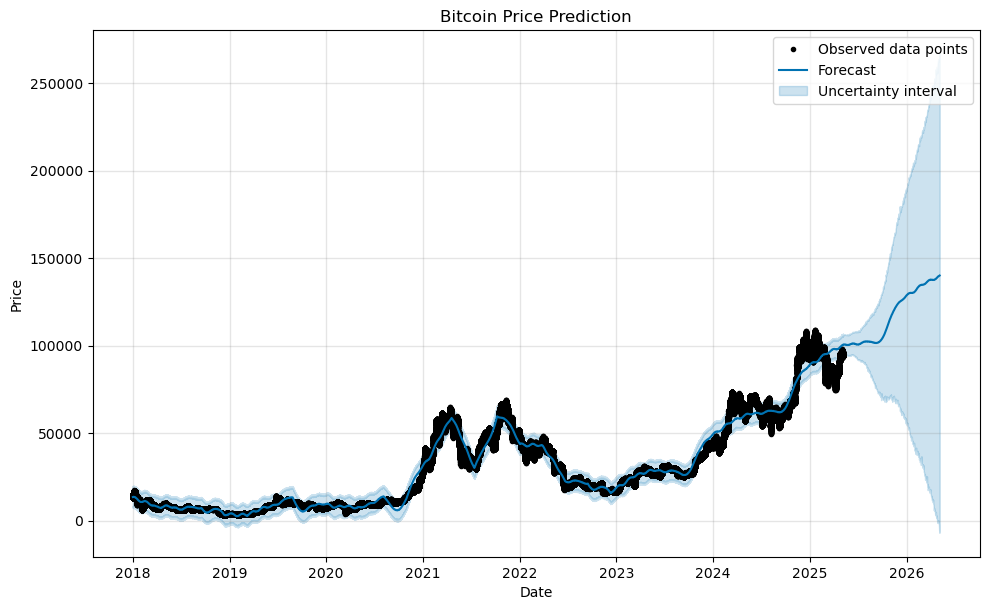

In [9]:
fig = model.plot(forecast)
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
forecast[['ds','yhat', 'yhat_upper','yhat_lower']].tail()

,ds,yhat,yhat_upper,yhat_lower
257327,2026-05-02,139632.749455,263723.050990,-1229.507211
257328,2026-05-03,139757.555577,263336.497657,-1570.218388
257329,2026-05-04,139801.415834,264373.188775,-5344.493050
257330,2026-05-05,139951.668061,266630.260913,-6992.581102
257331,2026-05-06,140013.019316,265169.351367,-5932.284400


In [11]:
btc_data['residuals'] = btc_data['y'] - forecast['yhat']

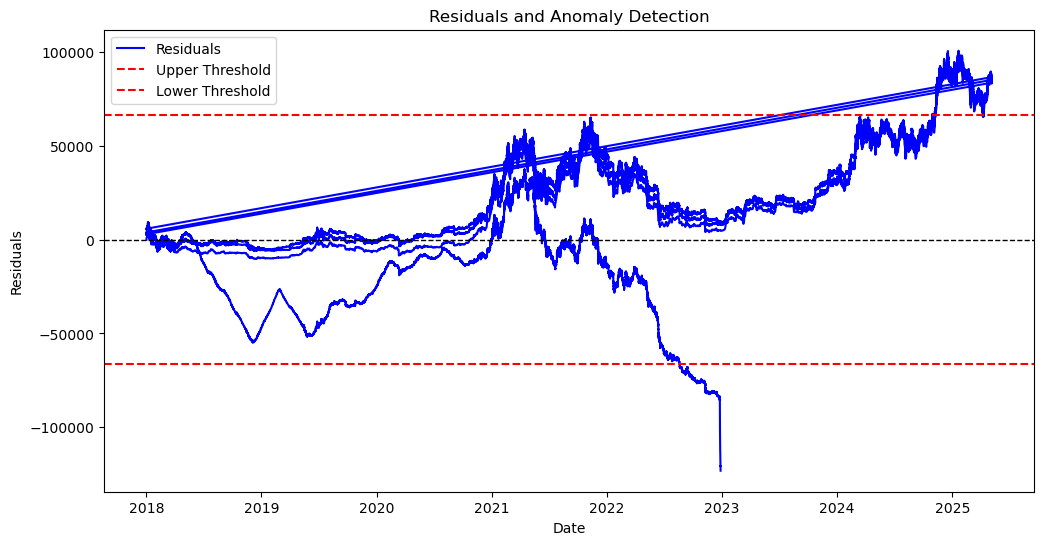

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(btc_data['ds'], btc_data['residuals'], label='Residuals', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=2 * btc_data['residuals'].std(), color='red', linestyle='--', label='Upper Threshold')
plt.axhline(y=-2 * btc_data['residuals'].std(), color='red', linestyle='--', label='Lower Threshold')
plt.title('Residuals and Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()